In [1]:
from IPython.display import Image, display

from typing import Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

In [2]:
import operator
from typing import Annotated

In [4]:
class State(TypedDict):
    # operator.add 리듀서 함수는 이것을 추가 전용으로 만듭니다
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"{self._value}를 {state['state']}에 추가합니다")
        return {"state": [self._value]}


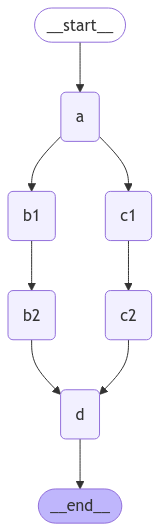

In [34]:
def sorting_reducer(left, right):
    """ 리스트의 값들을 결합하고 정렬합니다"""
    # print(f"Left: {left}, Right: {right}")
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right, reverse=False)

class State(TypedDict):
    # sorting_reducer는 상태의 값들을 정렬합니다
    state: Annotated[list, sorting_reducer]

# 노드 추가
builder = StateGraph(State)

# 각 노드를 node_secret으로 초기화 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b1", ReturnNodeValue("I'm B1"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c1", ReturnNodeValue("I'm C1"))
builder.add_node("c2", ReturnNodeValue("I'm C2"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# 흐름
builder.add_edge(START, "a")
builder.add_edge("a", "b1")
builder.add_edge("a", "c1")
builder.add_edge("b1", "b2")
builder.add_edge("c1", "c2")
builder.add_edge(["b2", "c2"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke({"state": []})

I'm A를 []에 추가합니다
I'm B1를 ["I'm A"]에 추가합니다
I'm C1를 ["I'm A"]에 추가합니다
I'm B2를 ["I'm A", "I'm B1", "I'm C1"]에 추가합니다
I'm C2를 ["I'm A", "I'm B1", "I'm C1"]에 추가합니다
I'm D를 ["I'm A", "I'm B1", "I'm C1", "I'm B2", "I'm C2"]에 추가합니다


{'state': ["I'm A", "I'm B1", "I'm C1", "I'm B2", "I'm C2", "I'm D"]}

In [35]:
graph.invoke({"state": []})

I'm A를 []에 추가합니다
I'm B1를 ["I'm A"]에 추가합니다
I'm C1를 ["I'm A"]에 추가합니다
I'm B2를 ["I'm A", "I'm B1", "I'm C1"]에 추가합니다
I'm C2를 ["I'm A", "I'm B1", "I'm C1"]에 추가합니다
I'm D를 ["I'm A", "I'm B1", "I'm B2", "I'm C1", "I'm C2"]에 추가합니다


{'state': ["I'm A", "I'm B1", "I'm B2", "I'm C1", "I'm C2", "I'm D"]}